In [1]:
import time
import numpy as np
import tensorflow as tf
print(tf.test.gpu_device_name())

import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.applications import VGG16
from keras.utils.vis_utils import plot_model

/device:GPU:0


In [2]:
# dimensions of our images.
img_width, img_height = 224, 224
channels = 3
batch_size = 64
n_train_samples = 5120
n_val_samples = 1280
epochs = 100

train_data_dir = '/content/drive/MyDrive/NN_project/data_00/train'
validation_data_dir = '/content/drive/MyDrive/NN_project/data_00/validation'

In [3]:
datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=n_train_samples,
        class_mode='binary',
        shuffle=True)

val_generator = datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=n_val_samples,
    class_mode='binary',
    shuffle=True)

Found 5120 images belonging to 2 classes.
Found 1280 images belonging to 2 classes.


In [4]:
x_train, y_train = next(train_generator)
x_val, y_val = next(val_generator)

In [5]:
pretrained_model = VGG16(input_shape=(img_height, img_width, channels), include_top=False, weights="imagenet")

58892288/58889256 [==============================] - 1s 0us/step


In [6]:
last_layer = pretrained_model.get_layer('block5_pool')
last_output = last_layer.output

for idx,layer in enumerate(pretrained_model.layers):
    layer.trainable = False

In [7]:
x = Flatten()(last_output)
x = BatchNormalization()(x)

x = Dropout(0.4)(x)
x = Dense(200, activation='relu')(x)
x = BatchNormalization()(x)

x = Dropout(0.4)(x)
x = Dense(100, activation='relu')(x)
x = BatchNormalization()(x)

x = BatchNormalization()(x)
x = Dense(1, activation='sigmoid')(x)

In [8]:
model = Model(pretrained_model.input, x)

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [9]:
history = model.fit(x_train, y_train,
                    batch_size=64, epochs=50,
                    validation_data=(x_val, y_val))

Epoch 1/50
80/80 [==============================] - 60s 593ms/step - loss: 0.6093 - accuracy: 0.7147 - val_loss: 0.8717 - val_accuracy: 0.5063
Epoch 2/50
80/80 [==============================] - 47s 585ms/step - loss: 0.2410 - accuracy: 0.9055 - val_loss: 0.8113 - val_accuracy: 0.5484
Epoch 3/50
80/80 [==============================] - 47s 585ms/step - loss: 0.1148 - accuracy: 0.9619 - val_loss: 0.4470 - val_accuracy: 0.7672
Epoch 4/50
80/80 [==============================] - 47s 584ms/step - loss: 0.0799 - accuracy: 0.9759 - val_loss: 0.3141 - val_accuracy: 0.8422
Epoch 5/50
80/80 [==============================] - 47s 585ms/step - loss: 0.0662 - accuracy: 0.9763 - val_loss: 0.1190 - val_accuracy: 0.9602
Epoch 6/50
80/80 [==============================] - 47s 585ms/step - loss: 0.0665 - accuracy: 0.9753 - val_loss: 0.0877 - val_accuracy: 0.9695
Epoch 7/50
80/80 [==============================] - 47s 585ms/step - loss: 0.0486 - accuracy: 0.9841 - val_loss: 0.0628 - val_accuracy: 0.9781

In [10]:
def plot_metrics(history):
  # plotting the metrics
  fig = plt.figure()
  plt.subplot(2,1,1)
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='lower right')

  plt.subplot(2,1,2)
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper right')

  plt.tight_layout()

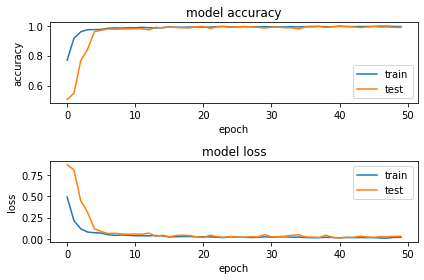

In [11]:
plot_metrics(history)

In [12]:
loss_and_metrics = model.evaluate(x_val, y_val, verbose=2)

print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])

40/40 - 13s - loss: 0.0310 - accuracy: 0.9883
Test Loss 0.030996346846222878
Test Accuracy 0.98828125


In [13]:
t0= time.process_time()
y_pred_sm = model.predict(x_val)
t1 = time.process_time() - t0
print("Time elapsed: ", t1, " seconds")

y_pred = np.argmax(y_pred_sm, axis=1)

Time elapsed:  9.857046205000188  seconds
